In [5]:
cd F:\PROJECTS\PROJECT_HUMAN FETAL COCHLEAE\WORKPLACE\R\ #python39

F:\PROJECTS\PROJECT_HUMAN FETAL COCHLEAE\WORKPLACE\R


In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import anndata
import os
import operator
import matplotlib.pyplot as plt
import sys


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

# sc.logging.print_versions()
# sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable
plt.show()

In [7]:
#pip install scFates

In [8]:
import scFates as scf

In [9]:
sc.set_figure_params()
adata = sc.read('Hu_sgn_python.h5ad')

In [10]:
adata

AnnData object with n_obs × n_vars = 143 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [11]:
from scFates.tools.utils import ProgressParallel
from joblib import delayed

In [12]:
sc.set_figure_params()
import scFates as scf
sc.pp.filter_genes(adata,min_cells=1)
sc.pp.normalize_total(adata, target_sum=1e3)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
adata.layers["scaled"]=sc.pp.scale(adata.X,max_value=10,copy=True)
adata.obsm["X_pca"]=sc.pp.pca(adata[:,adata.var.highly_variable].layers["scaled"])

filtered out 13466 genes that are detected in less than 1 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50
    finished (0:00:00)


In [15]:
sc.pp.filter_genes(adata, min_cells=1)
adata

AnnData object with n_obs × n_vars = 143 × 23135
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_pca', 'X_umap'
    layers: 'scaled'

In [16]:
adata.obs['orig.ident']

Human_23W_AACAAGCCATTATGAC-1    HU_23W
Human_23W_ACGACTTAGTATCGCG-1    HU_23W
Human_23W_AGTTGCAGTTAGCAGC-1    HU_23W
Human_23W_CAAGCTAGTTGCATCT-1    HU_23W
Human_23W_CATAATCCATGTCGCG-1    HU_23W
                                 ...  
Human_26W_TGATCTTGTATGTCAC-1    HU_26W
Human_26W_TGATTTCGTGAGTCAG-1    HU_26W
Human_26W_TGCATCCCAAAGTGTA-1    HU_26W
Human_26W_TTACCGCGTGCCTTCT-1    HU_26W
Human_26W_TTTCACACAAGCACAG-1    HU_26W
Name: orig.ident, Length: 143, dtype: category
Categories (3, object): ['HU_23W', 'HU_25W', 'HU_26W']

In [17]:
#X_scVI = pd.read_csv('human_sgn_scVI.csv', index_col=0)
#adata.obsm["X_scVI"] = X_scVI.to_numpy()

G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


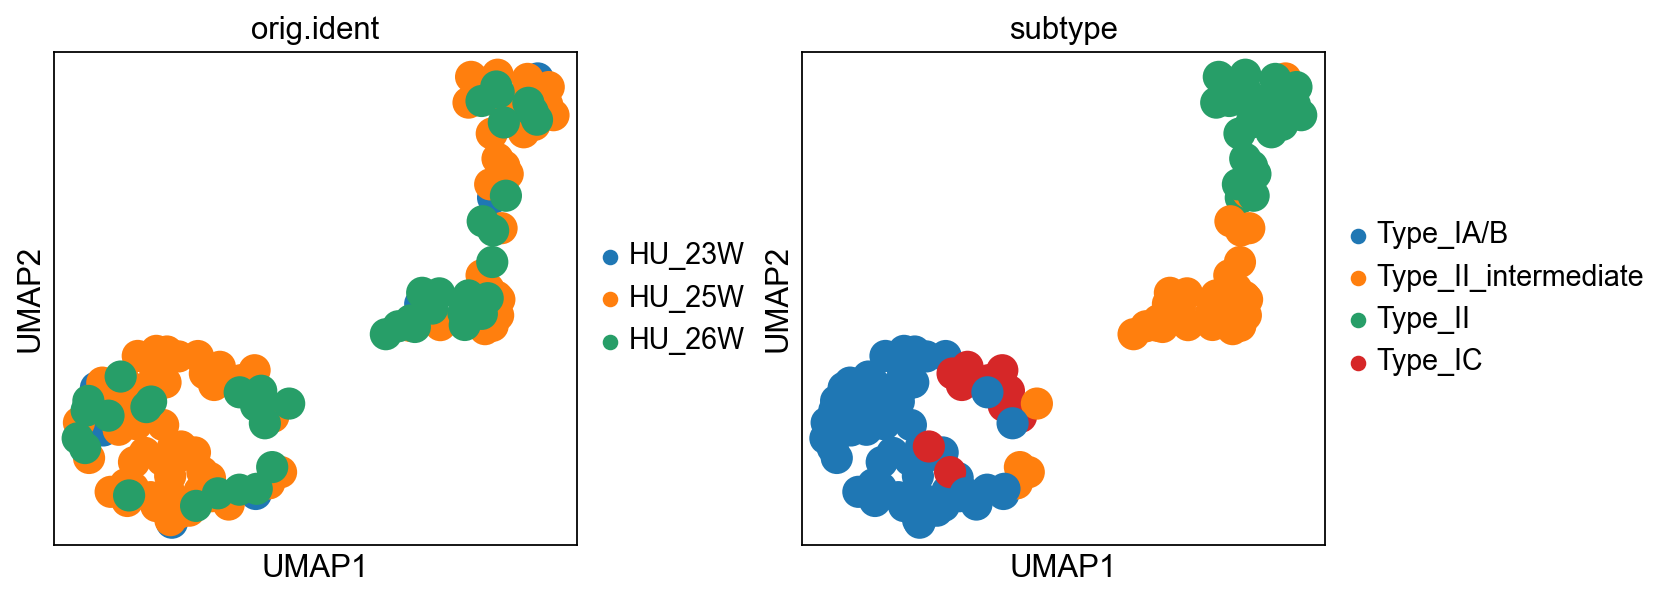

In [18]:
sc.pl.umap(adata, color=['orig.ident', 'subtype'], wspace=0.3)
plt.show()

In [19]:
#sc.pp.neighbors(adata,n_neighbors=14,use_rep="X_scVI")
#sc.tl.leiden(adata,resolution=1,key_added='clusters')#, min_dist=0.4
#sc.tl.umap(adata)

G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


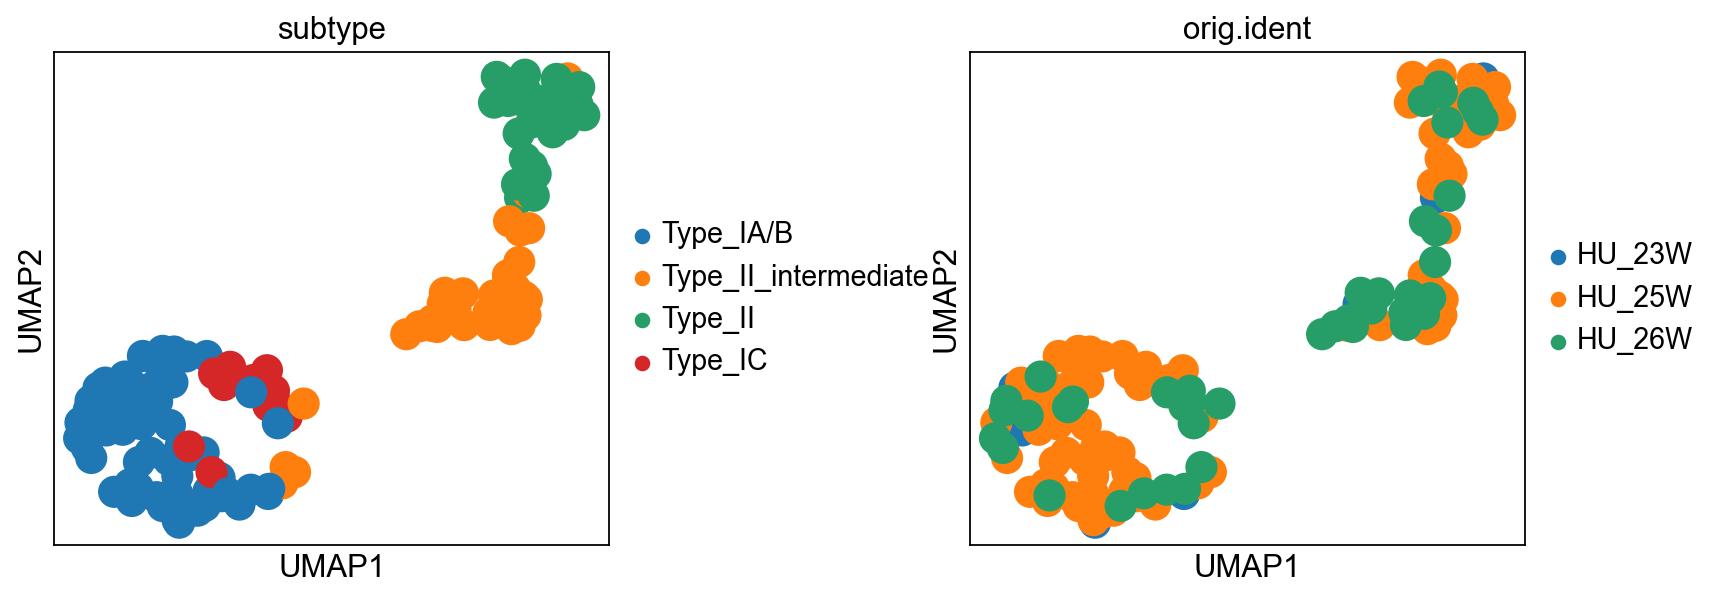

In [20]:
sc.pl.umap(
    adata,
    color=['subtype', "orig.ident"], 
    frameon=True,  wspace = 0.5
)#ncols = 1,

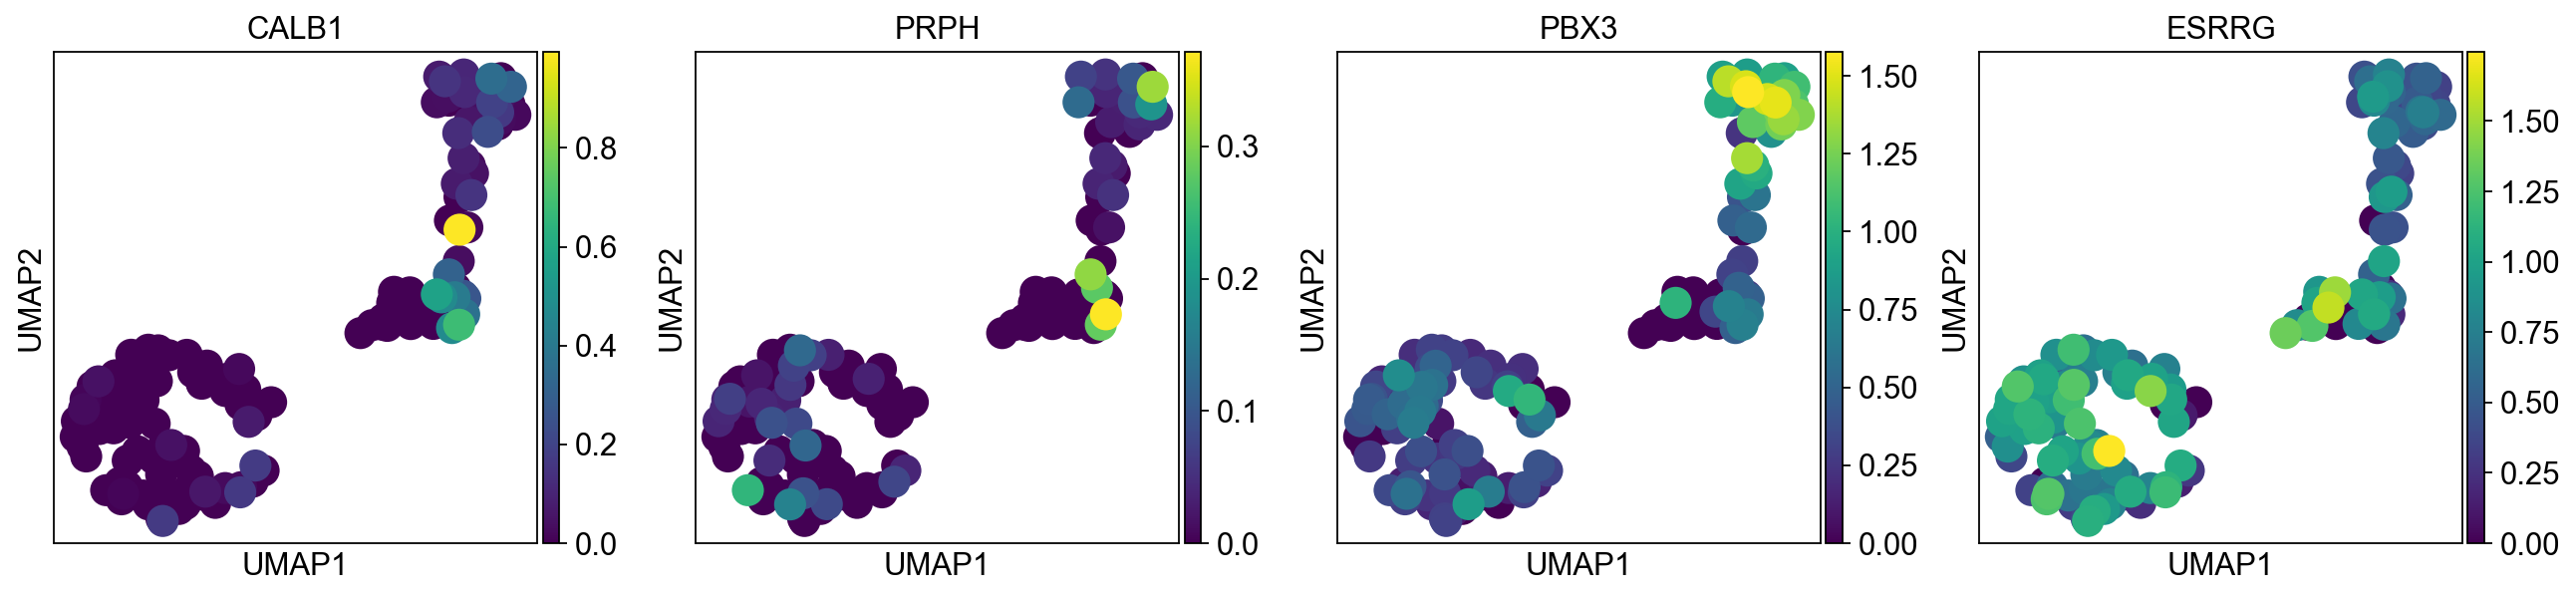

In [21]:
sc.pl.umap(adata, color=['CALB1', 'PRPH', 'PBX3','ESRRG'])

In [22]:
adata

AnnData object with n_obs × n_vars = 143 × 23135
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'orig.ident_colors', 'subtype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'scaled'

In [23]:
import scanpy as sc
import scFates as scf
from matplotlib.colors import LinearSegmentedColormap
sc.set_figure_params()

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [24]:
scf.tl.tree(adata,Nodes=100,use_rep="X_umap",method="ppt",seed=1,ppt_lambda=50,ppt_sigma=.15,ppt_nsteps=100)

inferring a principal tree --> parameters used 
    100 principal points, sigma = 0.15, lambda = 50, metric = euclidean
    fitting:  26%|█████████                          | 26/100 [00:01<00:04, 18.11it/s]
    converged
    finished (0:00:01) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


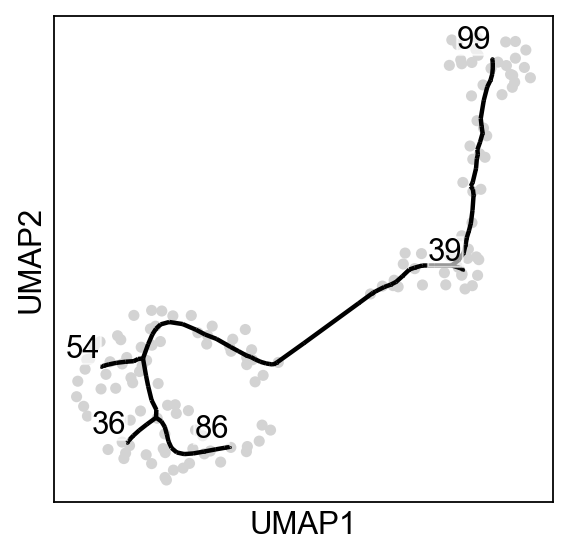

In [25]:
scf.pl.graph(adata,basis="umap",size_nodes=.1,forks=False,s=100)

In [26]:
scf.tl.root(adata,99)
scf.tl.pseudotime(adata)

node 99 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:00) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


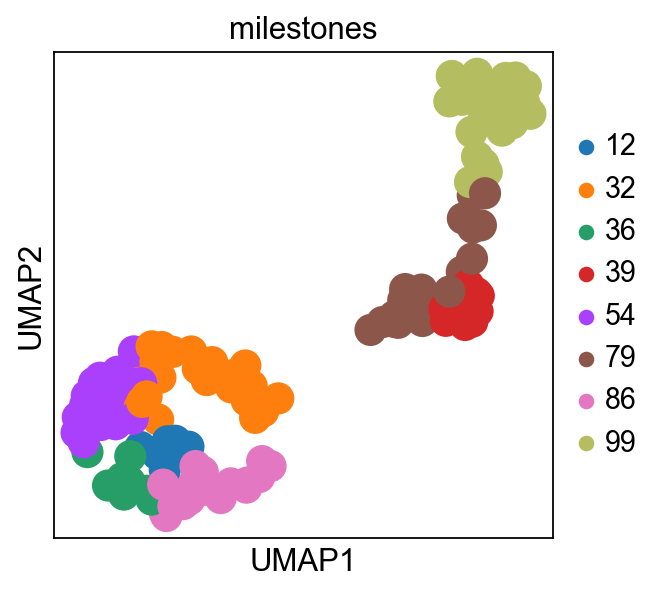

In [27]:
sc.set_figure_params(dpi_save=600)
sc.pl.umap(adata,color="milestones")

G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


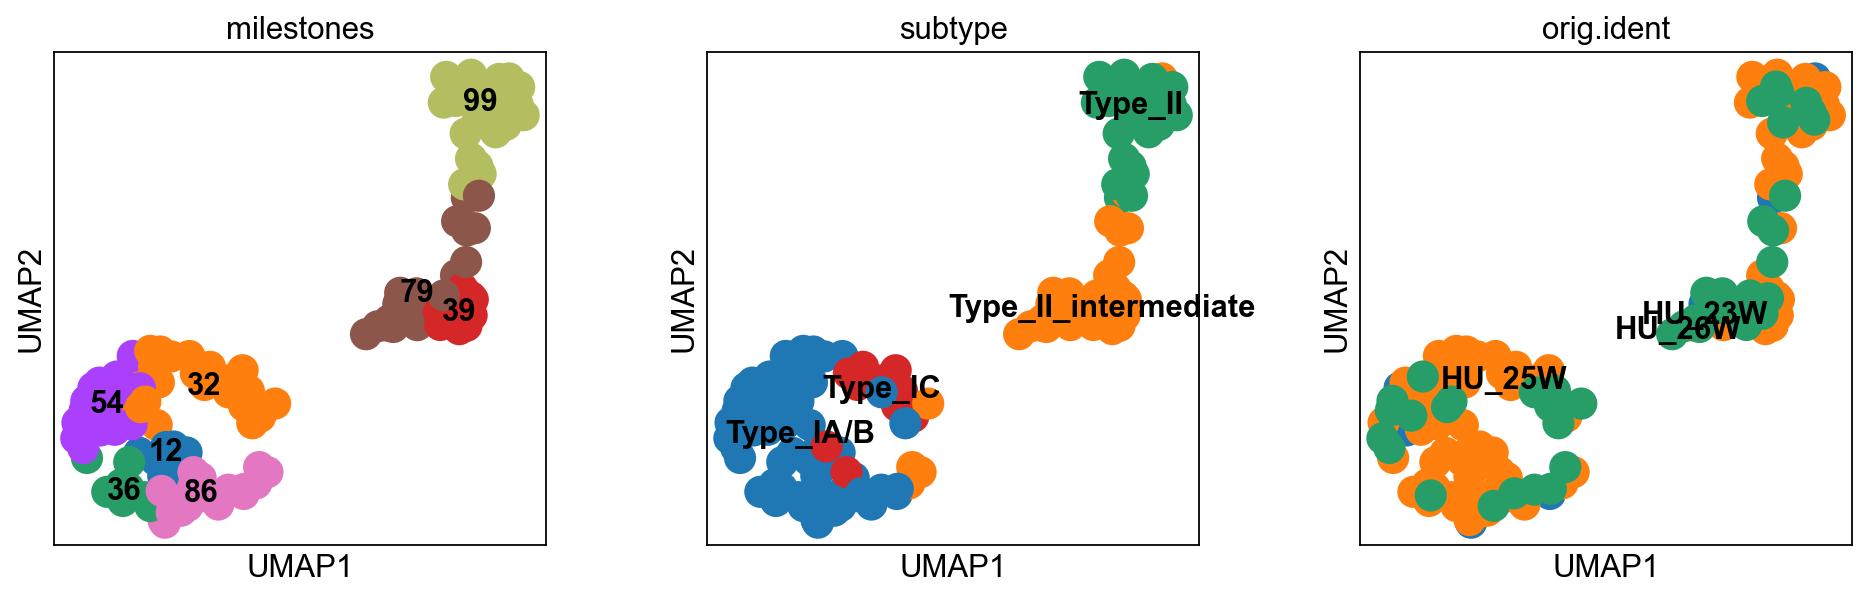

In [28]:
sc.set_figure_params(dpi_save=600)
sc.pl.umap(adata,color=["milestones",'subtype','orig.ident'],legend_loc="on data")

In [29]:
import pandas as pd
import numpy as np
mils=pd.Series(adata.uns["graph"]["milestones"])
adata.uns["milestones_colors"]=np.array(adata.uns["milestones_colors"])
adata.uns["seg_colors"]=[adata.uns["milestones_colors"][m][0] for m in [adata.obs.milestones.cat.categories==mils[mils==t].index[0] for t in adata.uns["graph"]["pp_seg"].to]]

G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


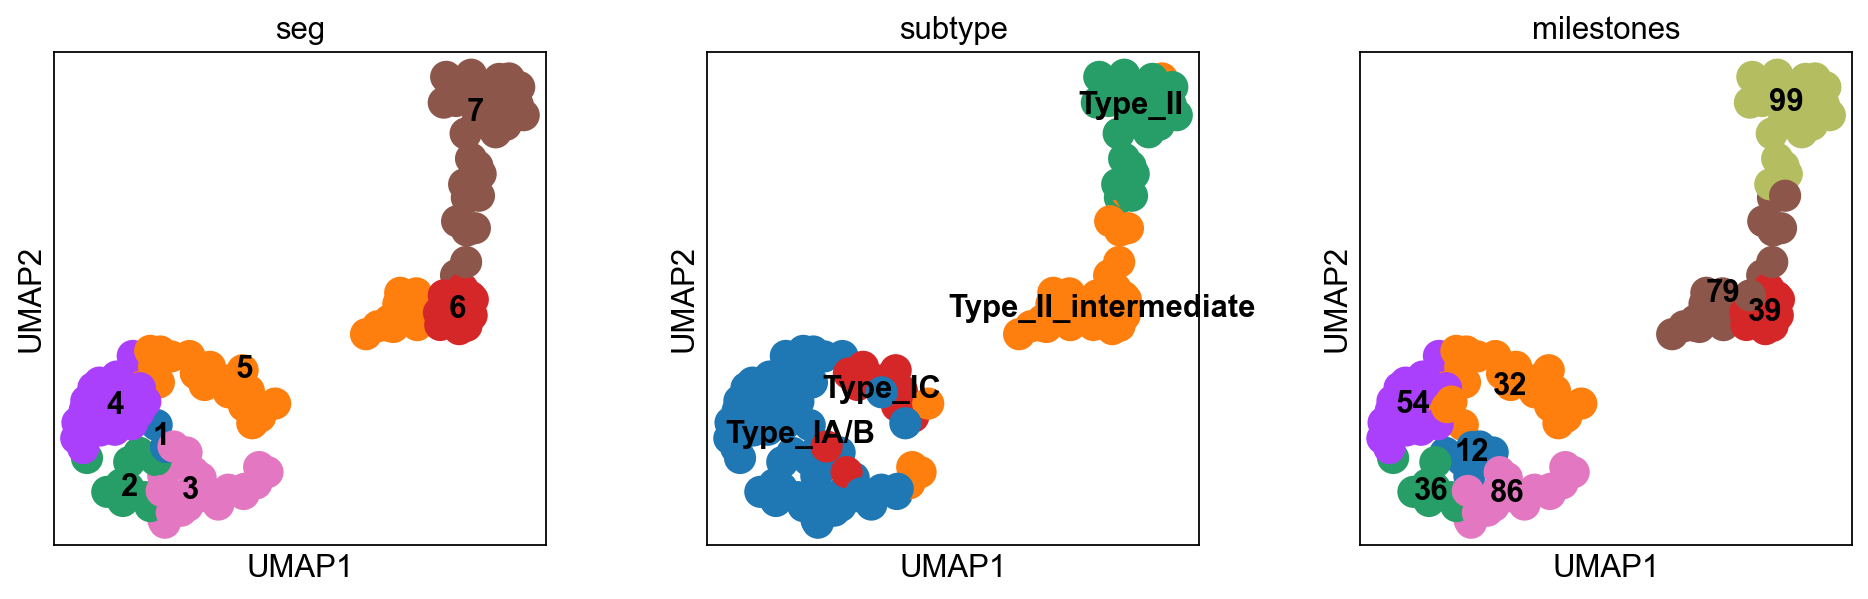

In [30]:
sc.pl.umap(adata,color=["seg","subtype","milestones"],legend_loc="on data")

G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


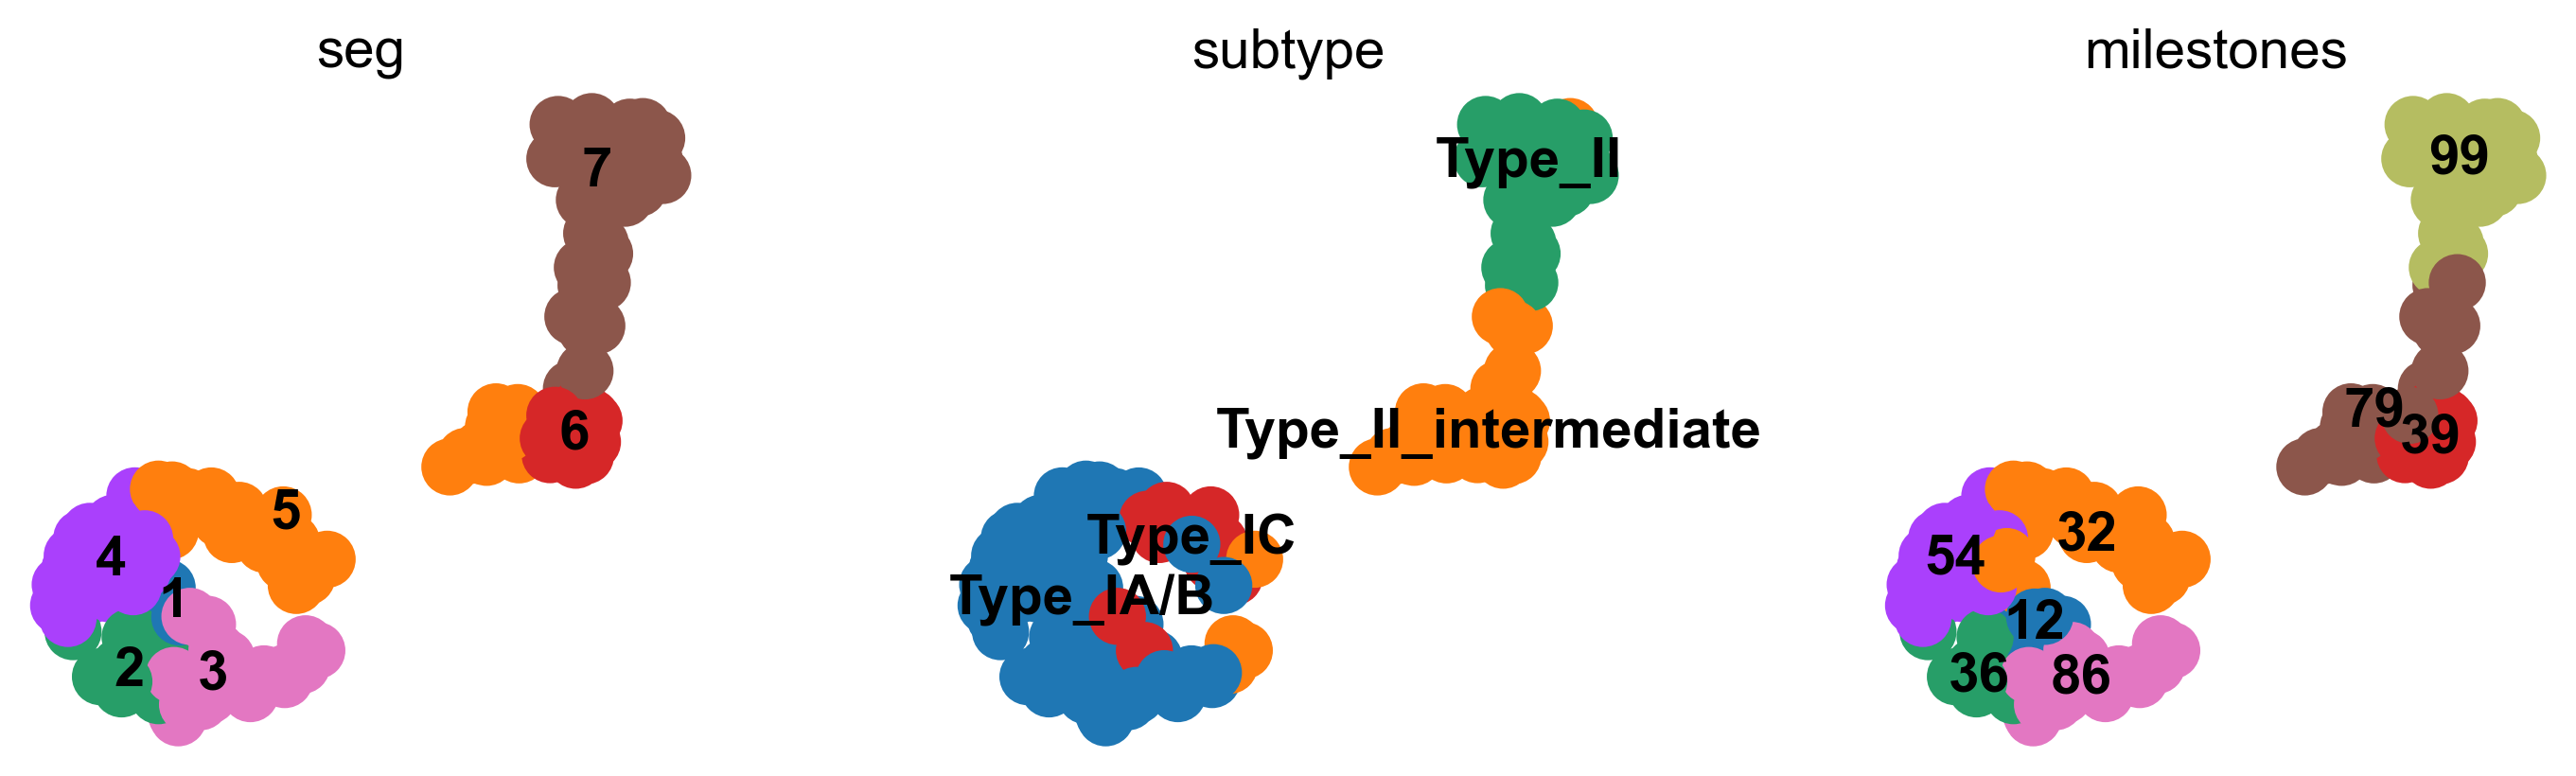

G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


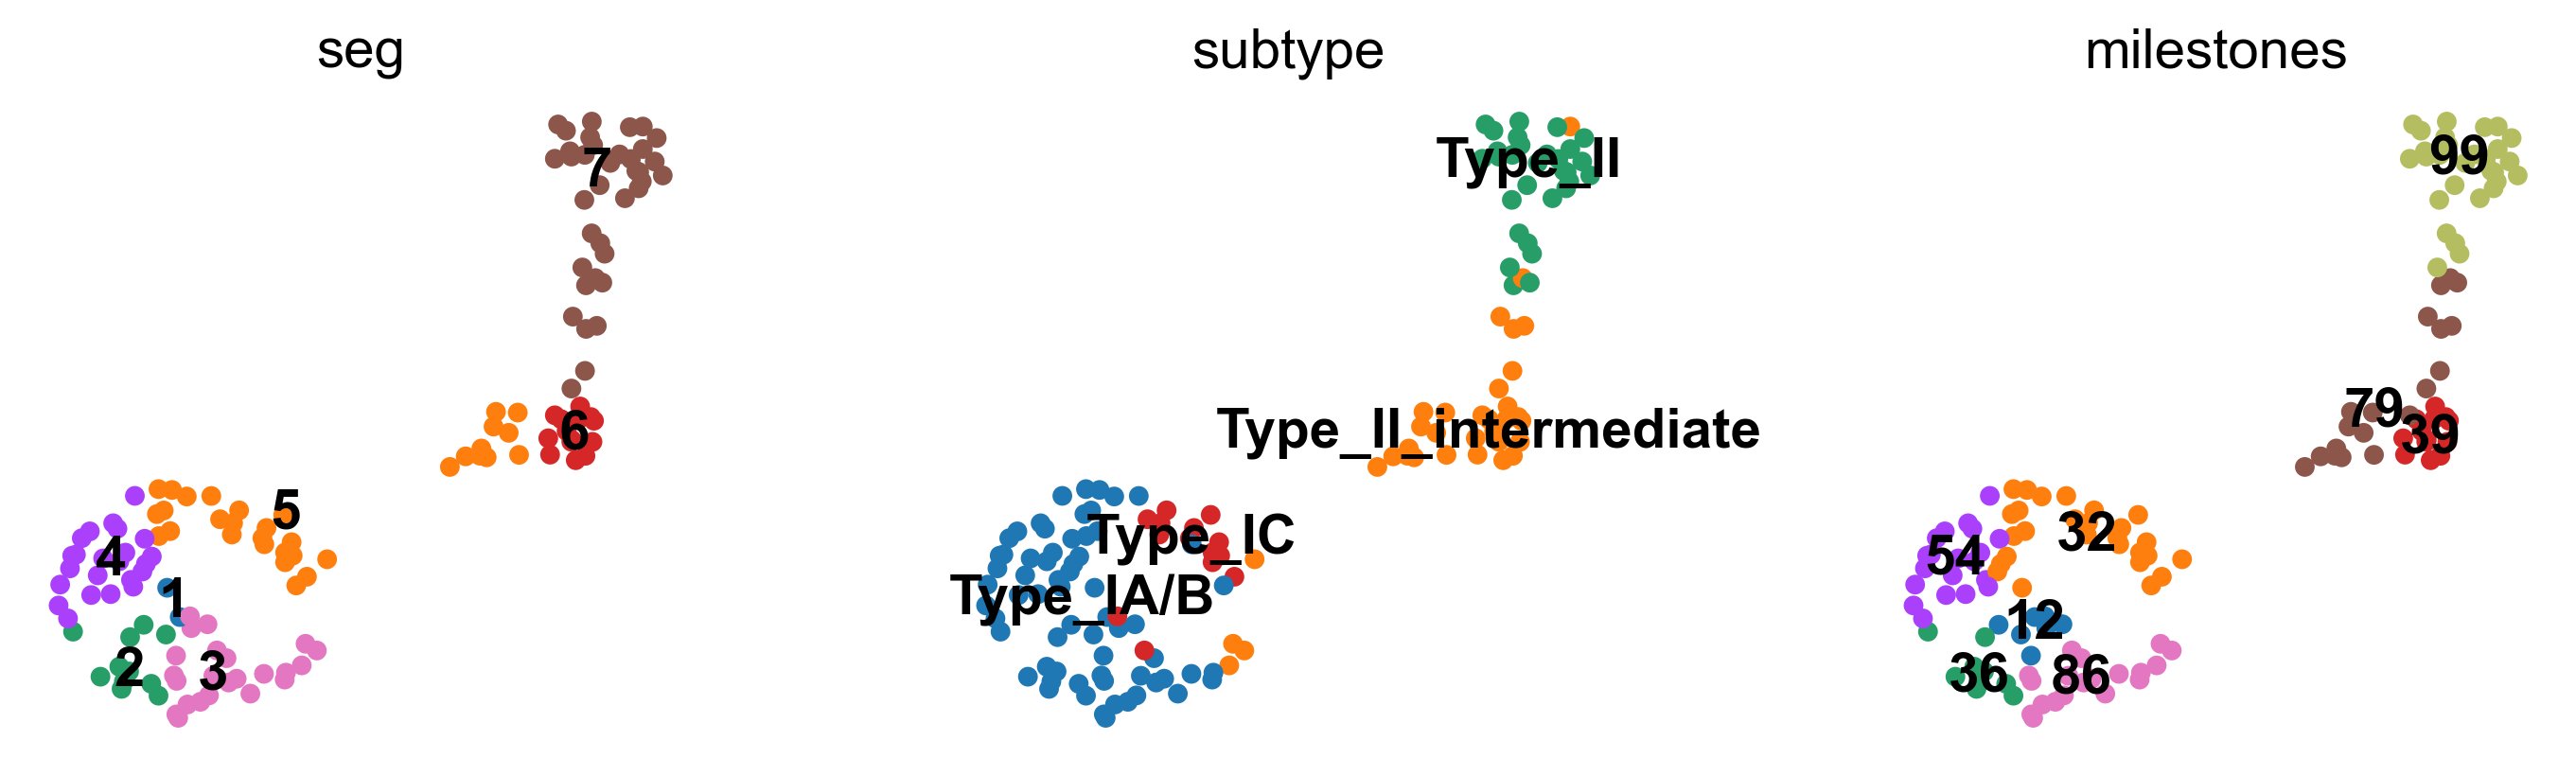

In [31]:
sc.set_figure_params(figsize=(3,3),frameon=False,dpi=150,dpi_save=600)
sc.pl.umap(adata,color=["seg","subtype","milestones"],legend_loc="on data")

sc.pl.umap(adata,color=["seg","subtype","milestones"],legend_loc="on data",
           frameon=False,s=100,save="umap.jpeg"
                  )

In [32]:
scf.tl.rename_milestones(adata,["Type_IA/B1","Type_IC","Type_IA/B2","Type_II_intermediate1","Type_IA/B3",
                                "Type_II_intermediate2","Type_IA/B4","Type_II"
                                
                                
                                
                              ])

G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


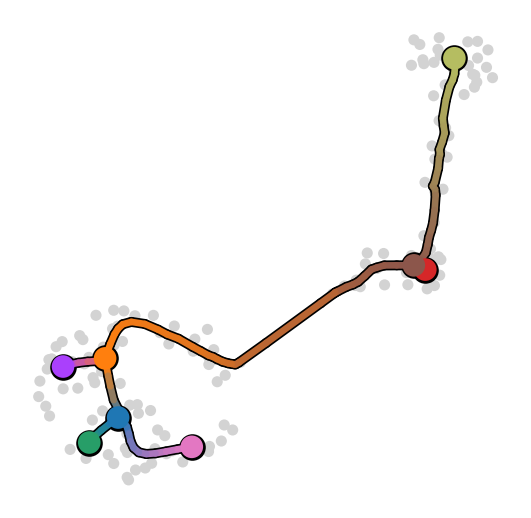

In [33]:
sc.set_figure_params(dpi_save=600)
scf.pl.trajectory(adata,color_seg="milestones",basis="umap",frameon=False,s=100,scale_path=.6,save="paths.png")

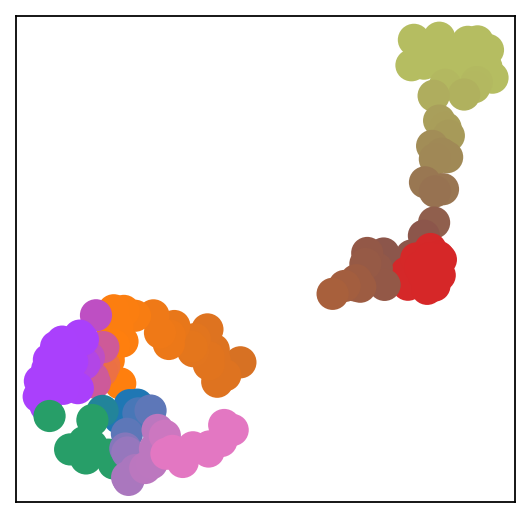

In [34]:
scf.pl.milestones(adata)

In [35]:
scf.tl.dendrogram(adata,crowdedness=.2)

Generating dendrogram of tree
    segment : 100%|████████████████████████████████████| 7/7 [00:00<00:00, 233.33it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


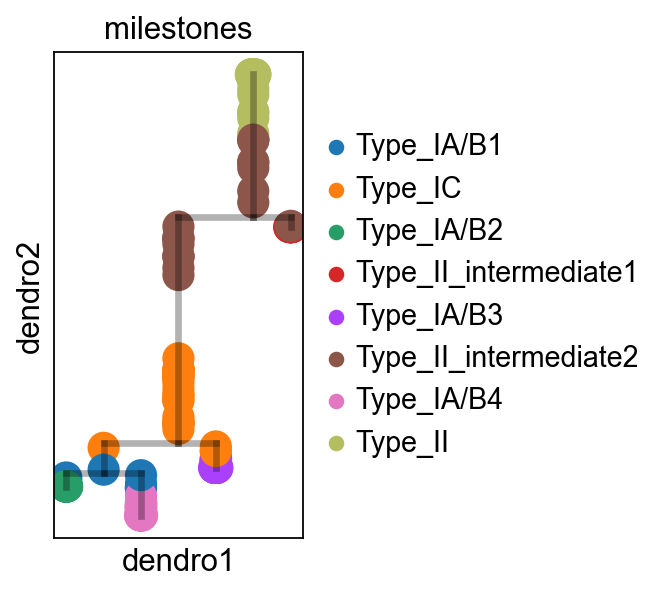

In [36]:
sc.set_figure_params(figsize=(2,4))
scf.pl.dendrogram(adata,color="milestones",groups=["Type_IA/B1","Type_IC","Type_IA/B2","Type_II_intermediate1","Type_IA/B3",
                                "Type_II_intermediate2","Type_IA/B4","Type_II"])

G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


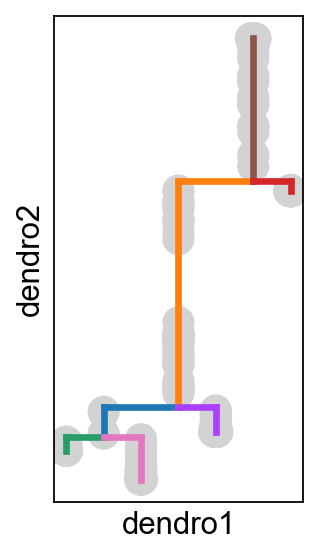

In [37]:
scf.pl.dendrogram(adata,color_seg="seg",alpha_seg=1)

G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


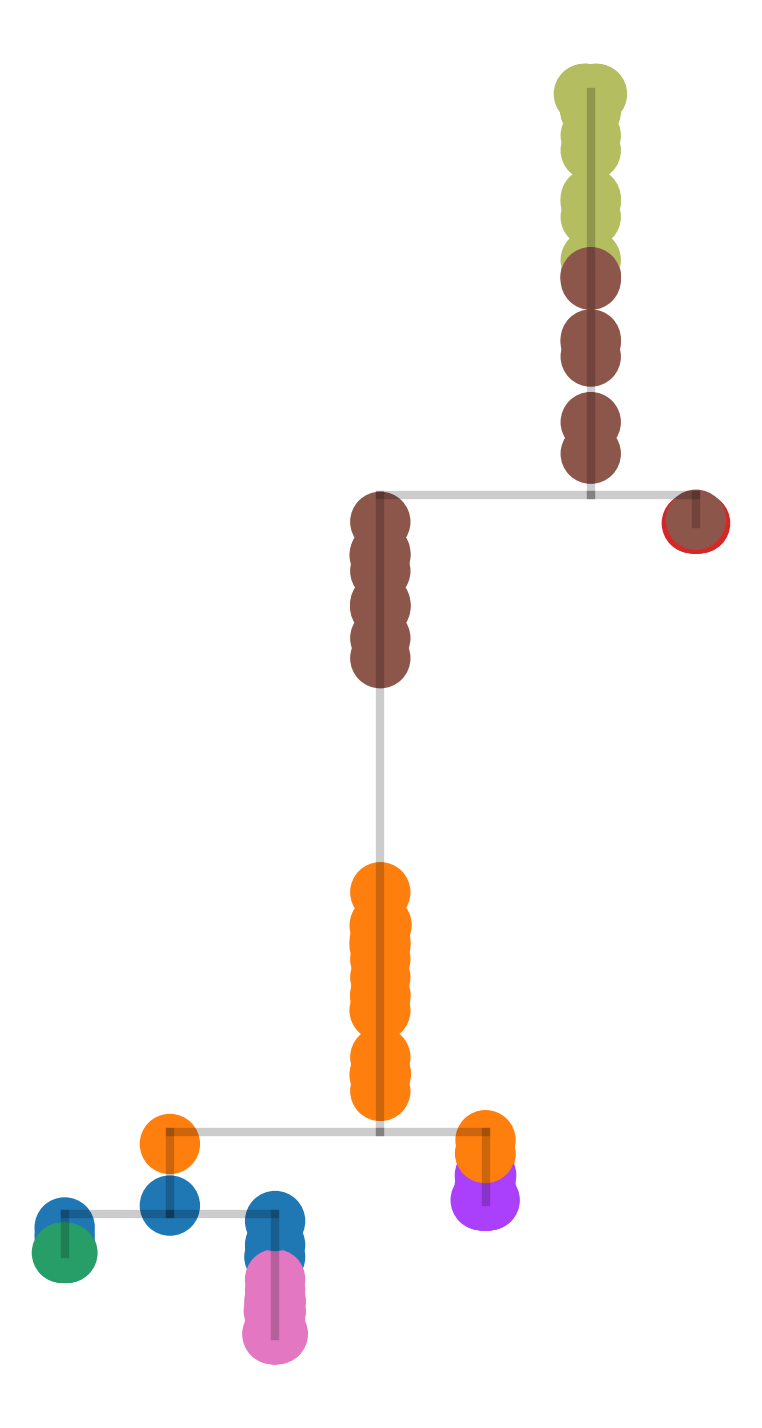

G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


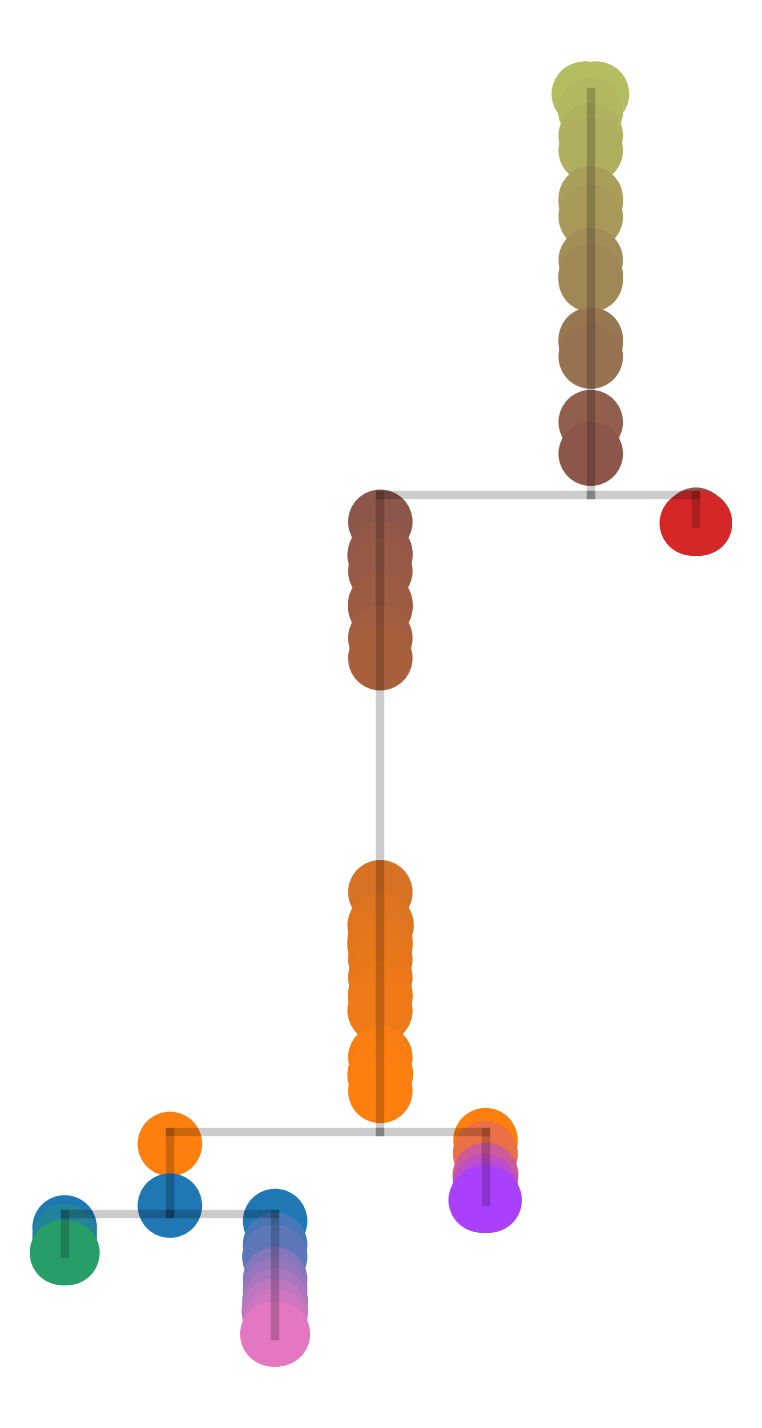

In [38]:
sc.set_figure_params(figsize=(3,6),frameon=False,dpi=150,dpi_save=600)
scf.pl.dendrogram(adata,color="milestones",title="",show_info=False,linewidth_seg=2,alpha_seg=.2)
scf.pl.dendrogram(adata,color_milestones=True,save="_milestones.svg",title="",show_info=False,linewidth_seg=2,alpha_seg=.2)

G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


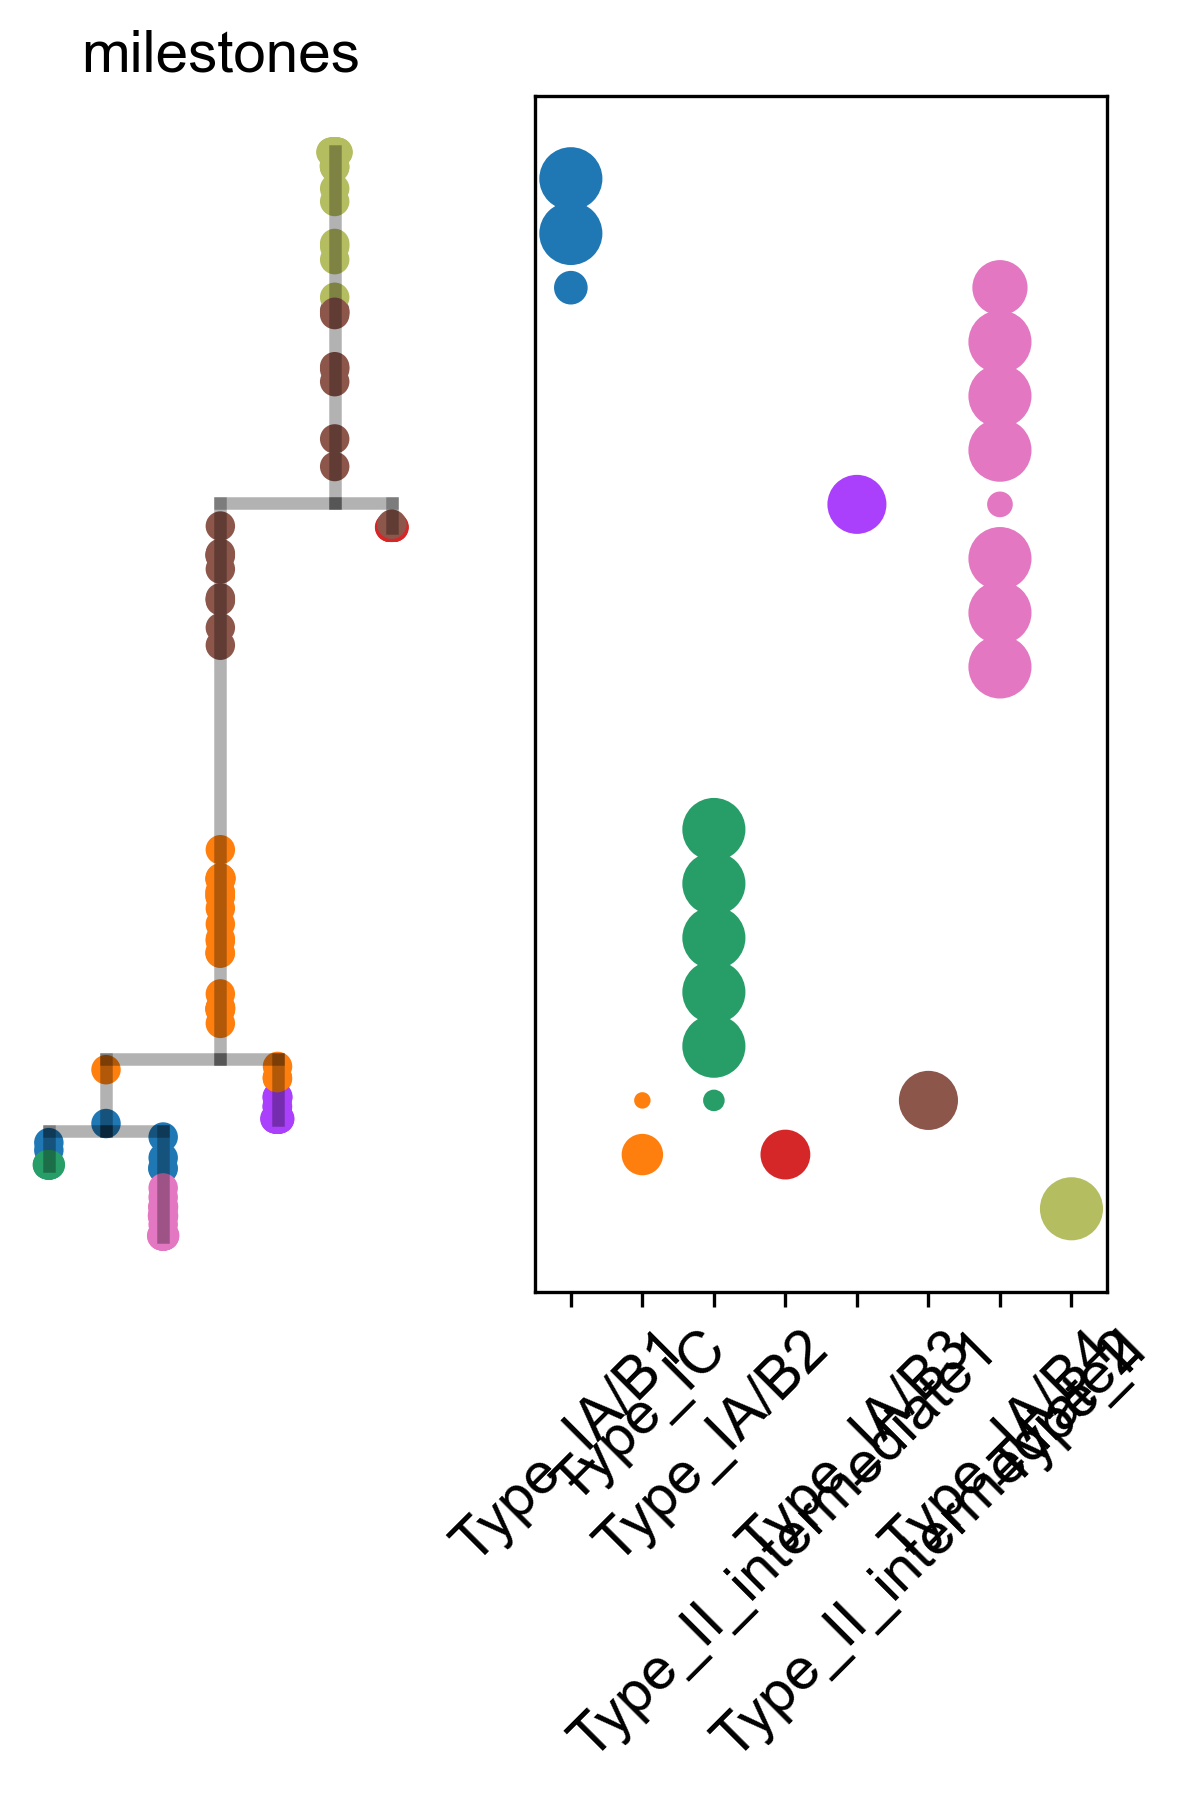

In [39]:
import matplotlib.pyplot as plt
sc.set_figure_params(figsize=(4,6),frameon=False,dpi=150,dpi_save=600)
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,gridspec_kw={"width_ratios":(2,3)})
scf.pl.dendrogram(adata,color="milestones",legend_loc="none",ax=ax1,s=200,show=False,frameon=False)
scf.pl.binned_pseudotime_meta(adata,"milestones",nbins=20,rotation=45,rev=True,show_colorbar=True,show=False,ax=ax2)
plt.savefig("figures/devtime_dendro_dotplot.svg")

G:\Miniconda3\envs\python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


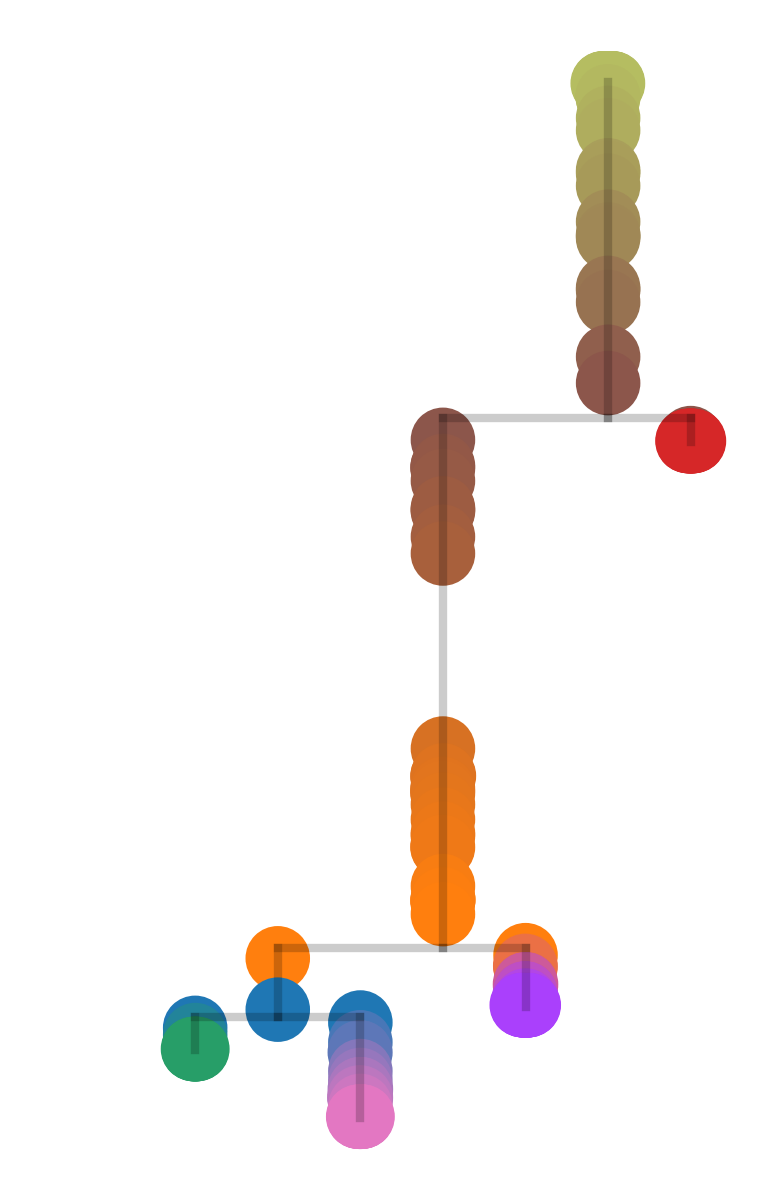

In [40]:
sc.set_figure_params(figsize=(3,5),frameon=False,dpi=150,dpi_save=600)
ax=scf.pl.dendrogram(adata,color_milestones=True,title="",show_info=False,linewidth_seg=2,alpha_seg=.2,show=False)
ax.set_xlim([-2,6.5])
ax.annotate("pseudotime",(2,3),(2,3),rotation=90,horizontalalignment='center',size=10,
            arrowprops=dict(facecolor="black",width=.1,headwidth=5))
plt.savefig("figures/dendrogram_milestones.pdf",bbox_inches="tight")

In [41]:
import scvelo as scv
scv.set_figure_params(figsize=(3.5,3.5))
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['pdf.fonttype'] = 42

saving figure to file ./figures/scvelo_devtime.pdf


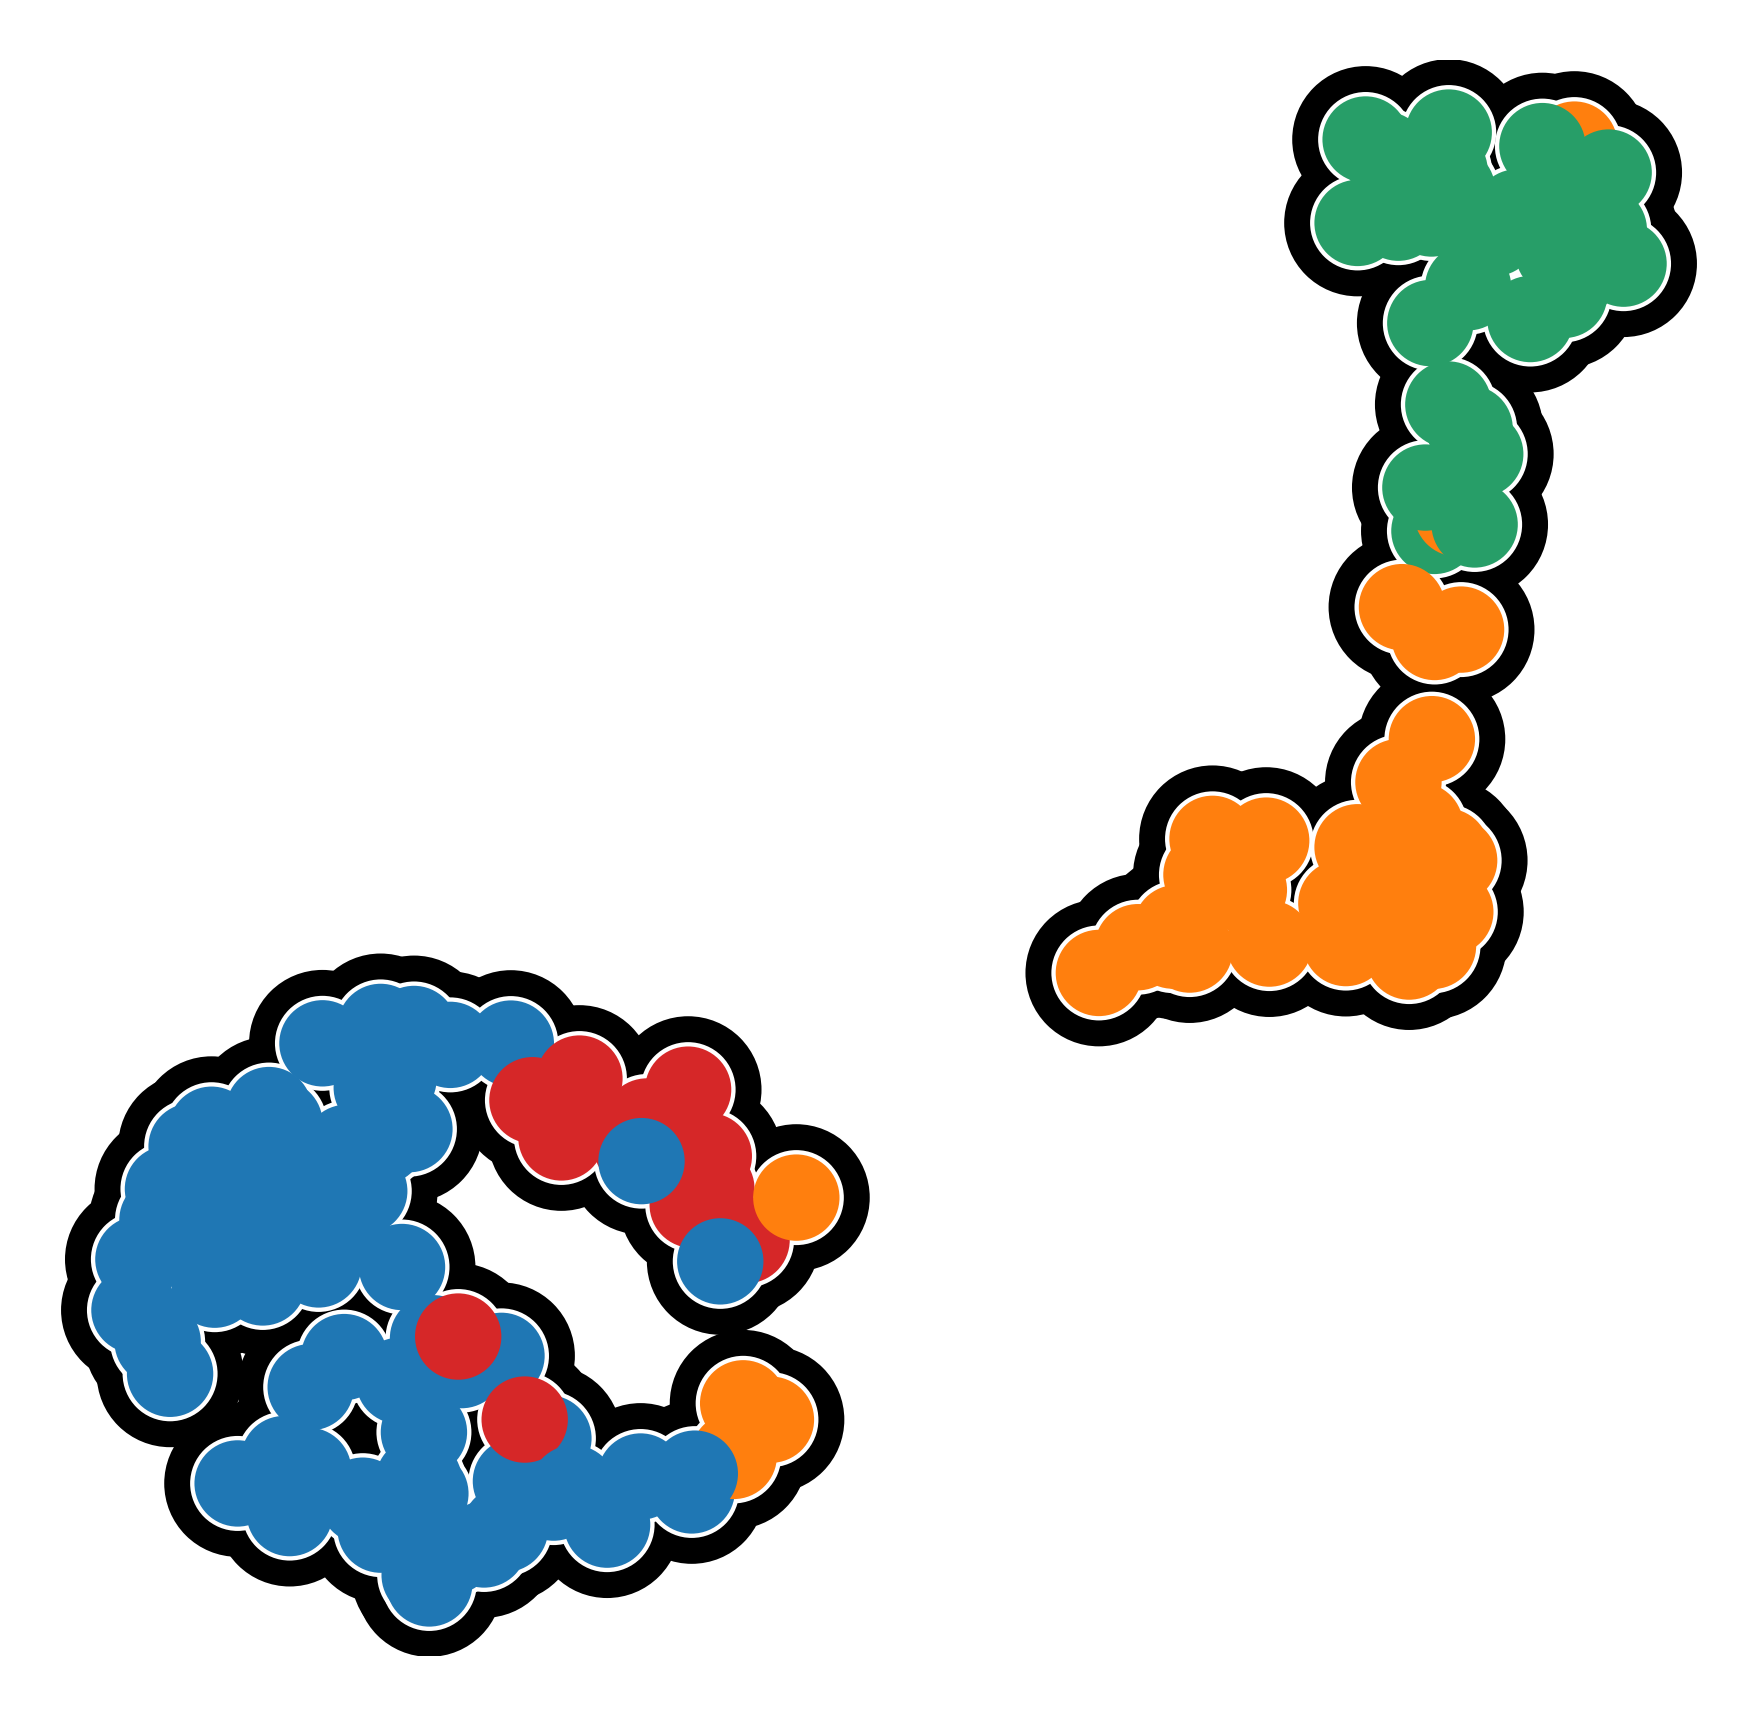

In [42]:
scv.pl.umap(adata,color="subtype",
                 legend_loc="none",add_outline=True,title="",dpi=300,
                 save="devtime.pdf")

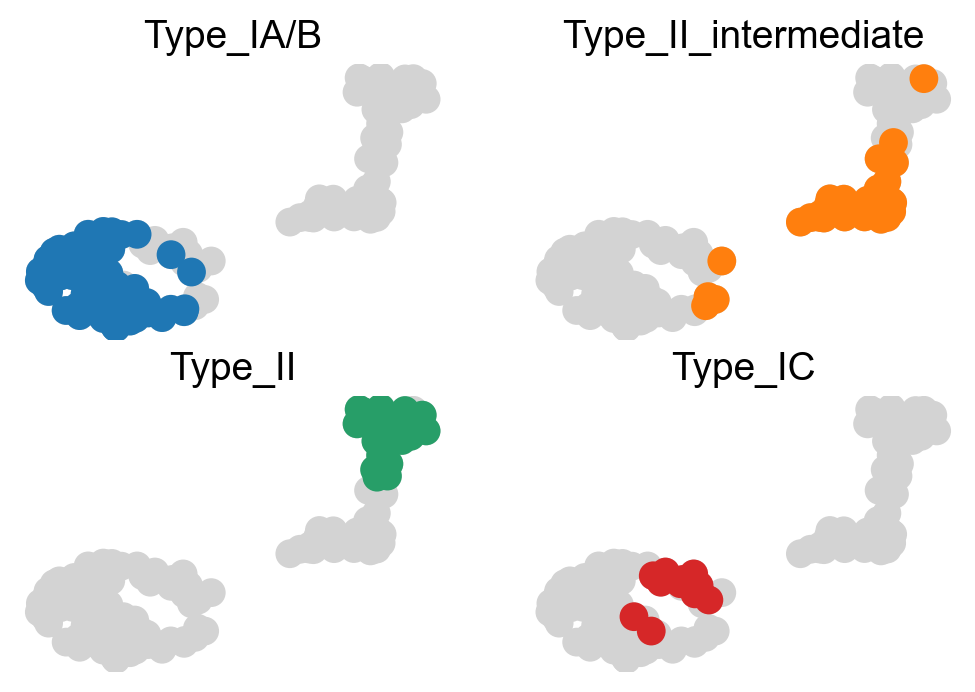

In [43]:
fig,axs=plt.subplots(2,2,figsize=(6,4))
axs=axs.ravel()
for i,d in enumerate(adata.obs.subtype.cat.categories):
    scv.pl.umap(adata,color="subtype",groups=[d],title="",legend_loc="none",ax=axs[i],show=False)
    axs[i].set_title(d,fontsize=14)
plt.savefig("figures/devtime_sep.pdf",bbox_inches="tight",dpi=300)

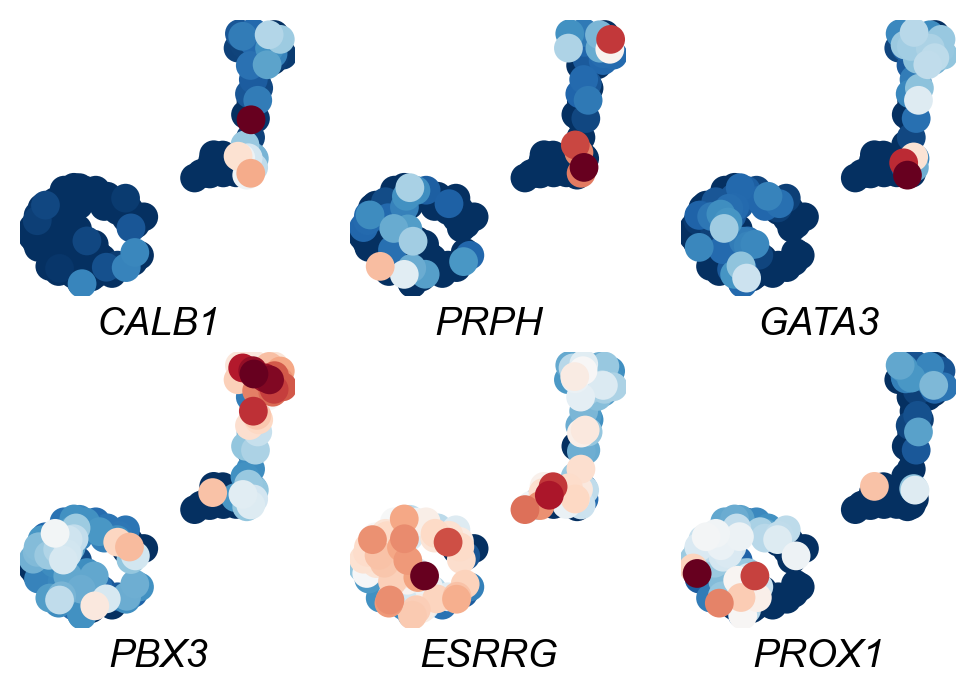

In [44]:
fig,axs=plt.subplots(2,3,figsize=(6,4))
axs=axs.ravel()
for i,d in enumerate(["CALB1","PRPH","GATA3","PBX3","ESRRG","PROX1"]):
    scv.pl.umap(adata,color=d,cmap="RdBu_r",layer="palantir_imp",title="",colorbar=False,ax=axs[i],show=False)
    axs[i].set_xlabel(d,style='italic',fontsize=14)
plt.savefig("figures/markers_main.pdf",bbox_inches="tight",dpi=300)